<a href="https://colab.research.google.com/github/Kubra183/Veri-Kumeleme/blob/master/Veri_K%C3%BCmeleme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the libraries required for the application in the algorithm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy import stats
from sklearn.metrics import accuracy_score


In [ ]:
data = pd.read_csv('verilerrr.csv') #importing the dataset
data.head()

,X,Y,sinif
0,15.55,28.65,2.0
1,14.90,27.55,2.0
2,14.45,28.35,2.0
3,14.15,28.80,2.0
4,13.75,28.05,2.0


In [ ]:
print("Dataset Shape:", data.shape)  #the shape of the dataset is checked

Dataset Shape: (788, 3)


In [ ]:
data.isnull().any().any() #we check if there are any missing values in the data set

True

In [ ]:
data.isnull().sum() #we check the number of errors

X        0
Y        0
sinif    1
dtype: int64

In [ ]:
data.dropna(inplace=True) #since the number of errors is low, we delete the error

In [ ]:
a = data.loc [:, ['X','Y']].values # extracting the above mentioned columns
print(a.shape) #controlling the shape of a.

(787, 2)


In [ ]:
# scale data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(a)

# check scaled data
print(scaled_data.shape)


(787, 2)


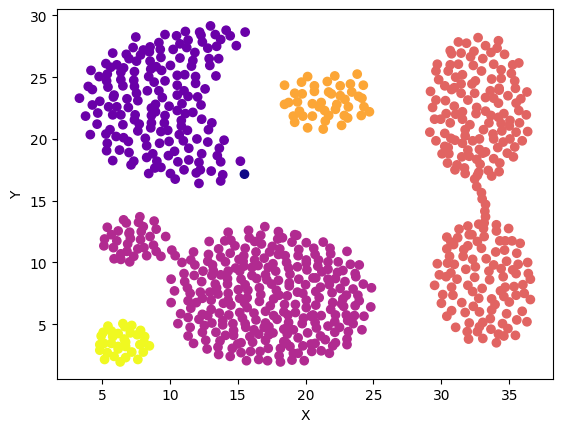

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 1.5 , min_samples = 5).fit(a) # fitting the model
labels = dbscan.labels_ # getting the labels
# Plot the clusters
plt.scatter(a[:, 0], a[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("X") # X-axis label
plt.ylabel("Y") # Y-axis label
plt.show() # showing the plot

In [ ]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Oluşan Küme Sayısı: {n_clusters_}")

Oluşan Küme Sayısı: 5


In [ ]:
n_noise_ = list(labels).count(-1)
print(f"Gürültü Nokta Sayısı: {n_noise_}")


Gürültü Nokta Sayısı: 1


In [ ]:
# Veriyi kümele
a = data[['X', 'Y']].values
dbscan_model = DBSCAN(eps=1.5, min_samples=5)
predicted_labels = dbscan_model.fit_predict(a)

# True etiketleri al
true_labels = data['sinif'].values

# Sonuçları ekrana yazdır
print("Gerçek Etiketler:")
print(true_labels)

print("\nTahmin Edilen Etiketler:")
print(predicted_labels)

Gerçek Etiketler:
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.
 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.

In [ ]:
from sklearn.metrics import homogeneity_score

homogeneity = homogeneity_score(true_labels, predicted_labels)
print(f"Homojenlik Skoru: {homogeneity}")

Homojenlik Skoru: 0.8003653404537728


In [ ]:
from sklearn.metrics import completeness_score

completeness = completeness_score(true_labels, predicted_labels)
print(f"Tamamlanmışlık Skoru: {completeness}")

Tamamlanmışlık Skoru: 0.9942815788496344


In [ ]:
from sklearn.metrics import v_measure_score

v_measure = v_measure_score(true_labels, predicted_labels)
print(f"V-Measure Skoru: {v_measure}")

V-Measure Skoru: 0.886846884257086


In [ ]:
from sklearn.metrics import adjusted_rand_score
ari_score = adjusted_rand_score(true_labels, predicted_labels)

print(f"ARI Skoru: {ari_score:.2f}")

ARI Skoru: 0.81


In [ ]:
# calculate success metrics
try:
    valid_labels = labels[labels != -1]
    silhouette_score_value = metrics.silhouette_score(scaled_data[labels != -1], valid_labels)
    davies_bouldin_score = metrics.davies_bouldin_score(scaled_data, labels)
    print(f'Silhouette Score: {silhouette_score_value}')
    print(f'Davies-Bouldin Score: {davies_bouldin_score}')
except ValueError as e:
    print(f'Error calculating silhouette score or Davies-Bouldin score: {e}')

Silhouette Score: 0.37098394123998757
Davies-Bouldin Score: 0.6439412515096435


In [ ]:
#create estimated values
# eps_values= [0.3,0.5,0.7,0.9,1,1.2,1.4,1.5]
eps_values=np.linspace(0.01,2,20)
# min_samples_values = [3,4,5,6,7,8]
min_samples_values = np.arange(2,10)


In [ ]:
#We use grid search to choose the combination that provides the best performance by trying different 'eps' and 'min_samples' values within a certain range
def dbscan_grid_search(a, eps_values, min_samples_values):
    best_silhouette_score = -1
    best_params = {'eps': None, 'min_samples': None}
    silhouette_score = -1



    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(a)

            # calculate success metrics ignoring label -1
            try:
              silhouette_score = metrics.silhouette_score(a, labels)
              print(f"eps:{eps}  min samples: {min_samples}  silhouette score: {silhouette_score} ")
              print(f'Silhouette Score: {silhouette_score}')
            except ValueError as e:
              print(f'Error calculating silhouette score: {e}')



            if silhouette_score > best_silhouette_score:
                best_silhouette_score = silhouette_score
                best_params['eps'] = eps
                best_params['min_samples'] = min_samples

    return best_params, best_silhouette_score

In [ ]:
best_params, best_silhouette_score = dbscan_grid_search(a, eps_values, min_samples_values)

print(f'Best Parameters: {best_params}')
print(f'Best Silhouette Score: {best_silhouette_score}')

# calculate success metrics
silhouette_score = metrics.silhouette_score(a, labels)
davies_bouldin_score = metrics.davies_bouldin_score(a, labels)

print(f'Silhouette Score: {silhouette_score}')
print(f'Davies-Bouldin Score: {davies_bouldin_score}')

Error calculating silhouette score: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Error calculating silhouette score: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Error calculating silhouette score: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Error calculating silhouette score: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Error calculating silhouette score: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Error calculating silhouette score: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Error calculating silhouette score: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Error calculating silhouette score: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
eps:0.11473684210526315  min samples: 2  silhouette score: -0.07060632277337578 
Silhouette Score: -0.07060632277337578
Error calculating silhou

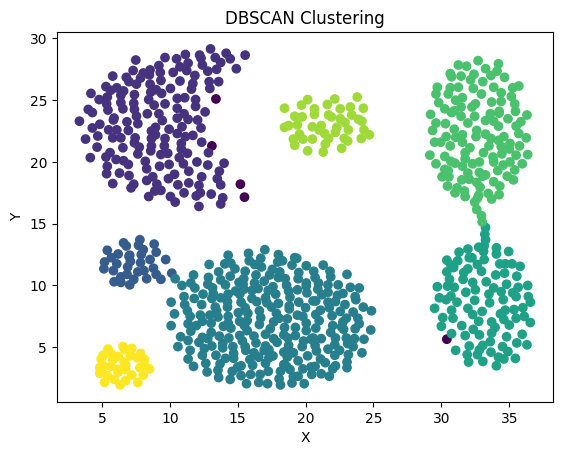

In [ ]:
dbscan = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
labels = dbscan.fit_predict(a)
plt.scatter(data['X'], data['Y'], c=labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


In [ ]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Oluşan Küme Sayısı: {n_clusters_}")

Oluşan Küme Sayısı: 7


In [ ]:
n_noise_ = list(labels).count(-1)
print(f"Gürültü Nokta Sayısı: {n_noise_}")

Gürültü Nokta Sayısı: 5


In [ ]:
# Veriyi kümele
a = data[['X', 'Y']].values
dbscan_model = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
predicted_labels = dbscan_model.fit_predict(a)

# True etiketleri al
true_labels = data['sinif'].values

# Sonuçları ekrana yazdır
print("Gerçek Etiketler:")
print(true_labels)

print("\nTahmin Edilen Etiketler:")
print(predicted_labels)

Gerçek Etiketler:
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.
 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.

In [ ]:
from sklearn.metrics import homogeneity_score

homogeneity = homogeneity_score(true_labels, predicted_labels)
print(f"Homojenlik Skoru: {homogeneity}")

Homojenlik Skoru: 0.8003653404537728


In [ ]:
from sklearn.metrics import completeness_score

completeness = completeness_score(true_labels, predicted_labels)
print(f"Tamamlanmışlık Skoru: {completeness}")

Tamamlanmışlık Skoru: 0.9942815788496344


In [ ]:
from sklearn.metrics import v_measure_score

v_measure = v_measure_score(true_labels, predicted_labels)
print(f"V-Measure Skoru: {v_measure}")

V-Measure Skoru: 0.886846884257086


In [ ]:
from sklearn.metrics import adjusted_rand_score
ari_score = adjusted_rand_score(true_labels, predicted_labels)

print(f"ARI Skoru: {ari_score:.2f}")

ARI Skoru: 0.99
